In [40]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn
sns.set_style('whitegrid')
%matplotlib inline


from sklearn.cross_validation import train_test_split

# Dataset Import
import statsmodels.api as sm

In [62]:
xls_file = pd.ExcelFile("data/Restaurant_Data.xlsx")
m = xls_file.parse('game_revenue_table')
m.head()

,Restaurant_Name,Date,Year,Month,Net_Sales,POS_Checks,Labor_Cost,Game_Revenue,Go_Live_Date,Franchise,State,Presto_Devices_Installed,Go_Live_Year,Go_Live_Month,Game_Revenue_Value
0,OR - 04,7/10/2014 12:00:00 AM,2014,7,3923.00,156,662.8000,16,5/4/2014 12:00:00 AM,Western Food Group,OR,40,2014,5,16.0000
1,AL - 04,8/1/2014 12:00:00 AM,2014,8,8160.00,297,1347.3700,n/a,12/1/2014 12:00:00 AM,Southern Group,AL,38,2014,12,0.0000
2,WA - 05,1/1/2014 12:00:00 AM,2014,1,2803.00,92,939.0600,n/a,7/1/2014 12:00:00 AM,Western Food Group,WA,38,2014,7,0.0000
3,AZ - 12,3/8/2015 12:00:00 AM,2015,3,4110.34,179,580.3461,17.9167,10/6/2014 12:00:00 AM,Western Food Group,AZ,50,2014,10,17.9167
4,Ca - 13,7/3/2014 12:00:00 AM,2014,7,4696.08,202,829.0617,19.8333,3/17/2014 12:00:00 AM,Western Food Group,CA,50,2014,3,19.8333


In [63]:
m1=m.drop(['Restaurant_Name','Date','Go_Live_Date','State','Game_Revenue'], axis=1)
m1.head()

,Year,Month,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Go_Live_Month,Game_Revenue_Value
0,2014,7,3923.00,156,662.8000,Western Food Group,40,2014,5,16.0000
1,2014,8,8160.00,297,1347.3700,Southern Group,38,2014,12,0.0000
2,2014,1,2803.00,92,939.0600,Western Food Group,38,2014,7,0.0000
3,2015,3,4110.34,179,580.3461,Western Food Group,50,2014,10,17.9167
4,2014,7,4696.08,202,829.0617,Western Food Group,50,2014,3,19.8333


In [64]:
m1_dummies = pd.get_dummies(m1['Year'])


In [65]:
m1_dummies.head()

,2014,2015
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0


In [66]:
m1_dummies.columns = ['2014','2015']
m1 = m1.drop(['Year'],axis=1)
m1.head()

,Month,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Go_Live_Month,Game_Revenue_Value
0,7,3923.00,156,662.8000,Western Food Group,40,2014,5,16.0000
1,8,8160.00,297,1347.3700,Southern Group,38,2014,12,0.0000
2,1,2803.00,92,939.0600,Western Food Group,38,2014,7,0.0000
3,3,4110.34,179,580.3461,Western Food Group,50,2014,10,17.9167
4,7,4696.08,202,829.0617,Western Food Group,50,2014,3,19.8333


In [67]:
m1 = pd.concat([m1,m1_dummies],axis=1)
m1.head()


,Month,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Go_Live_Month,Game_Revenue_Value,2014,2015
0,7,3923.00,156,662.8000,Western Food Group,40,2014,5,16.0000,1,0
1,8,8160.00,297,1347.3700,Southern Group,38,2014,12,0.0000,1,0
2,1,2803.00,92,939.0600,Western Food Group,38,2014,7,0.0000,1,0
3,3,4110.34,179,580.3461,Western Food Group,50,2014,10,17.9167,0,1
4,7,4696.08,202,829.0617,Western Food Group,50,2014,3,19.8333,1,0


In [68]:
def month_to_quarter(x):
    if x == 1 or x == 2 or x== 3:
        return "Q1"
    elif x == 4 or x == 5 or x == 6:
        return "Q2"
    elif x==7 or x==8 or x == 9:
        return "Q3"
    elif x ==10 or x==11 or x==12:
        return "Q4"
    else:
        return "wrong"
  
# Apply to DataFrame
m1['Month'] = m1['Month'].apply(month_to_quarter)
m1.head()

,Month,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Go_Live_Month,Game_Revenue_Value,2014,2015
0,Q3,3923.00,156,662.8000,Western Food Group,40,2014,5,16.0000,1,0
1,Q3,8160.00,297,1347.3700,Southern Group,38,2014,12,0.0000,1,0
2,Q1,2803.00,92,939.0600,Western Food Group,38,2014,7,0.0000,1,0
3,Q1,4110.34,179,580.3461,Western Food Group,50,2014,10,17.9167,0,1
4,Q3,4696.08,202,829.0617,Western Food Group,50,2014,3,19.8333,1,0


In [69]:
m1=m1.drop(['Go_Live_Month'], axis=1)
m1.head()

,Month,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value,2014,2015
0,Q3,3923.00,156,662.8000,Western Food Group,40,2014,16.0000,1,0
1,Q3,8160.00,297,1347.3700,Southern Group,38,2014,0.0000,1,0
2,Q1,2803.00,92,939.0600,Western Food Group,38,2014,0.0000,1,0
3,Q1,4110.34,179,580.3461,Western Food Group,50,2014,17.9167,0,1
4,Q3,4696.08,202,829.0617,Western Food Group,50,2014,19.8333,1,0


In [70]:
m2_dummies = pd.get_dummies(m1['Month'])
m2_dummies.columns = ['Q1','Q2','Q3','Q4']
m2 = m1.drop(['Month'],axis=1)
m2.head()


,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value,2014,2015
0,3923.00,156,662.8000,Western Food Group,40,2014,16.0000,1,0
1,8160.00,297,1347.3700,Southern Group,38,2014,0.0000,1,0
2,2803.00,92,939.0600,Western Food Group,38,2014,0.0000,1,0
3,4110.34,179,580.3461,Western Food Group,50,2014,17.9167,0,1
4,4696.08,202,829.0617,Western Food Group,50,2014,19.8333,1,0


In [71]:
m3 = pd.concat([m2,m2_dummies],axis=1)
m3.head()

,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value,2014,2015,Q1,Q2,Q3,Q4
0,3923.00,156,662.8000,Western Food Group,40,2014,16.0000,1,0,0,0,1,0
1,8160.00,297,1347.3700,Southern Group,38,2014,0.0000,1,0,0,0,1,0
2,2803.00,92,939.0600,Western Food Group,38,2014,0.0000,1,0,1,0,0,0
3,4110.34,179,580.3461,Western Food Group,50,2014,17.9167,0,1,1,0,0,0
4,4696.08,202,829.0617,Western Food Group,50,2014,19.8333,1,0,0,0,1,0


In [77]:
def convert_to_period(x):
    if x <2014 :
        return "[2012,2014]"
    elif x >2014 or x <2015:
        return "[2014,2015)"
    else:
        return "2015"

m3["Go_Live_Year"] = m3['Go_Live_Year'].apply(convert_to_period)


In [80]:
m3_dummies = pd.get_dummies(m3['Go_Live_Year'])
m3_dummies.columns = ['[2012,2014]','[2014,2015]','2015']
m3 = m3.drop(['Go_Live_Year'],axis=1)
m3.head()


,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Game_Revenue_Value,2014,2015,Q1,Q2,Q3,Q4
0,3923.00,156,662.8000,Western Food Group,40,16.0000,1,0,0,0,1,0
1,8160.00,297,1347.3700,Southern Group,38,0.0000,1,0,0,0,1,0
2,2803.00,92,939.0600,Western Food Group,38,0.0000,1,0,1,0,0,0
3,4110.34,179,580.3461,Western Food Group,50,17.9167,0,1,1,0,0,0
4,4696.08,202,829.0617,Western Food Group,50,19.8333,1,0,0,0,1,0


In [81]:
m3 = pd.concat([m3,m3_dummies],axis=1)
m3.head()

,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Game_Revenue_Value,2014,2015,Q1,Q2,Q3,Q4,"[2012,2014]","[2014,2015]",2015
0,3923.00,156,662.8000,Western Food Group,40,16.0000,1,0,0,0,1,0,0,1,0
1,8160.00,297,1347.3700,Southern Group,38,0.0000,1,0,0,0,1,0,0,1,0
2,2803.00,92,939.0600,Western Food Group,38,0.0000,1,0,1,0,0,0,0,1,0
3,4110.34,179,580.3461,Western Food Group,50,17.9167,0,1,1,0,0,0,0,1,0
4,4696.08,202,829.0617,Western Food Group,50,19.8333,1,0,0,0,1,0,0,1,0


In [82]:
m4_dummies = pd.get_dummies(m3['Franchise'])

In [83]:
m4_dummies.columns = ['Central_Foods','Southern_Group','Western_Food_Group']
m4 = m3.drop(['Franchise'],axis=1)
m4.head()


,Net_Sales,POS_Checks,Labor_Cost,Presto_Devices_Installed,Game_Revenue_Value,2014,2015,Q1,Q2,Q3,Q4,"[2012,2014]","[2014,2015]",2015
0,3923.00,156,662.8000,40,16.0000,1,0,0,0,1,0,0,1,0
1,8160.00,297,1347.3700,38,0.0000,1,0,0,0,1,0,0,1,0
2,2803.00,92,939.0600,38,0.0000,1,0,1,0,0,0,0,1,0
3,4110.34,179,580.3461,50,17.9167,0,1,1,0,0,0,0,1,0
4,4696.08,202,829.0617,50,19.8333,1,0,0,0,1,0,0,1,0


In [84]:
m4 = pd.concat([m4,m4_dummies],axis=1)
m4.head()


,Net_Sales,POS_Checks,Labor_Cost,Presto_Devices_Installed,Game_Revenue_Value,2014,2015,Q1,Q2,Q3,Q4,"[2012,2014]","[2014,2015]",2015,Central_Foods,Southern_Group,Western_Food_Group
0,3923.00,156,662.8000,40,16.0000,1,0,0,0,1,0,0,1,0,0,0,1
1,8160.00,297,1347.3700,38,0.0000,1,0,0,0,1,0,0,1,0,0,1,0
2,2803.00,92,939.0600,38,0.0000,1,0,1,0,0,0,0,1,0,0,0,1
3,4110.34,179,580.3461,50,17.9167,0,1,1,0,0,0,0,1,0,0,0,1
4,4696.08,202,829.0617,50,19.8333,1,0,0,0,1,0,0,1,0,0,0,1


C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


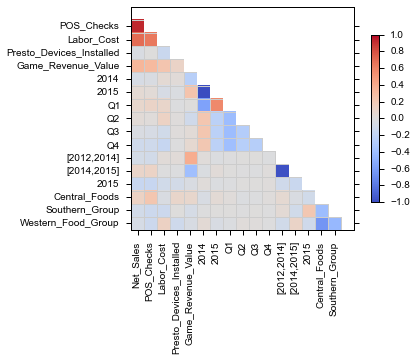

In [85]:
#Below is the correlation plot in heatmap form
import seaborn

kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

ax = seaborn.corrplot(m4, annot=False, diag_names=False)

In [86]:
#Above we find that the 2014 and 2015,[2012,2014] and [2014,2015] have strong correlation
#whereas the Central_Group and Western_Food_Group have strong correlation
#Yet,Net_Sales and POS_check has a strong correlation,labor_Cost and Net_Sales 
#have a strong correlation


# To avoid strong multi-colinearality side effect, I will drop the POS_Checks variable and [2014,2015],'2015',"Central Group"
# and recheck our model

#Here,m4 is the examining point


In [126]:
m5=m4.drop(['POS_Checks','[2014,2015]','2015','Central_Foods'], axis=1)
m5.head()

,Net_Sales,Labor_Cost,Presto_Devices_Installed,Game_Revenue_Value,2014,Q1,Q2,Q3,Q4,"[2012,2014]",Southern_Group,Western_Food_Group
0,3923.00,662.8000,40,16.0000,1,0,0,1,0,0,0,1
1,8160.00,1347.3700,38,0.0000,1,0,0,1,0,0,1,0
2,2803.00,939.0600,38,0.0000,1,1,0,0,0,0,0,1
3,4110.34,580.3461,50,17.9167,0,1,0,0,0,0,0,1
4,4696.08,829.0617,50,19.8333,1,0,0,1,0,0,0,1


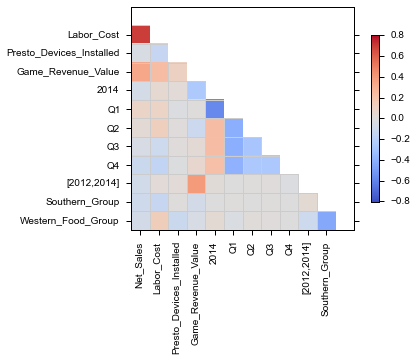

In [127]:
kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

ax = seaborn.corrplot(m5, annot=False, diag_names=False)

In [128]:
m6=m5.drop(['Labor_Cost'], axis=1)

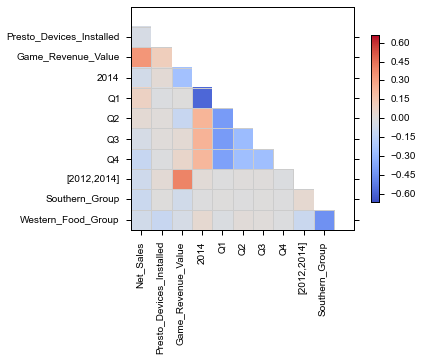

In [129]:
kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

ax = seaborn.corrplot(m6, annot=False, diag_names=False)

In [130]:
Y = m6.Game_Revenue_Value
Y.head()

0    16.0000
1     0.0000
2     0.0000
3    17.9167
4    19.8333
Name: Game_Revenue_Value, dtype: float64

In [131]:
Y = np.ravel(Y)

In [132]:
Y

array([ 16.    ,   0.    ,   0.    , ...,  14.5   ,  17.6667,  12.9167])

In [133]:
X = m6.drop(['Game_Revenue_Value'],axis=1)

X.head()


,Net_Sales,Presto_Devices_Installed,2014,Q1,Q2,Q3,Q4,"[2012,2014]",Southern_Group,Western_Food_Group
0,3923.00,40,1,0,0,1,0,0,0,1
1,8160.00,38,1,0,0,1,0,0,1,0
2,2803.00,38,1,1,0,0,0,0,0,1
3,4110.34,50,0,1,0,0,0,0,0,1
4,4696.08,50,1,0,0,1,0,0,0,1


In [134]:
import sklearn
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# Fit our data
linear_model.fit(X,Y)

# Check our accuracy
linear_model.score(X,Y)

0.42894661604536999

In [135]:
Y.mean()

10.740757914852603

In [136]:
# Use zip to bring the column names 
#and the np.transpose function to bring together the coefficients from the model
#"transpose" is used to allaign our coefficient from rows to columns
coeff_df = DataFrame(zip(X.columns, np.transpose(linear_model.coef_)))
#the new seaborn treat assignment as just an assignment without printing
coeff_df

,0,1
0,Net_Sales,0.001975
1,Presto_Devices_Installed,0.166079
2,2014,-7.709977
3,Q1,-2.939149
4,Q2,-0.922207
5,Q3,1.426046
6,Q4,2.435310
7,"[2012,2014]",6.528972
8,Southern_Group,-0.505886
9,Western_Food_Group,0.531325


In [137]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

linear_model2 = LinearRegression()

# Now fit the new model
linear_model2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [138]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
linear_model2 = LinearRegression()

# Now fit the new model
linear_model2.fit(X_train, Y_train)

In [139]:
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)

print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)


pred_train = linear_model2.predict(X_train)
pred_test = linear_model2.predict(X_test)
Fit a model X_train, and calculate MSE with Y_train: 31.68
Fit a model X_train, and calculate MSE with X_test and Y_test: 31.19


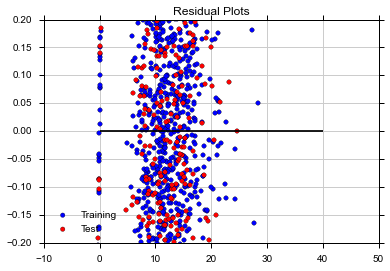

In [140]:
# Scatter plot the training data
#c = 'b' ----color = "brown", alpha =1 ----how see-through this is 
plt.ylim(-0.2,0.2)
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=1)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=1)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=0,xmax=40)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')


In [141]:
#This Scatter plot shows a pretty decent result though the linear model score has us .43 
# and the MSE is 31.67 so this model is pretty good if the prediction standard in the industry is not too high

In [142]:
m7=m4.drop(['Net_Sales','[2014,2015]','2015','Central_Foods','Labor_Cost'], axis=1)
m7.head()


,POS_Checks,Presto_Devices_Installed,Game_Revenue_Value,2014,Q1,Q2,Q3,Q4,"[2012,2014]",Southern_Group,Western_Food_Group
0,156,40,16.0000,1,0,0,1,0,0,0,1
1,297,38,0.0000,1,0,0,1,0,0,1,0
2,92,38,0.0000,1,1,0,0,0,0,0,1
3,179,50,17.9167,0,1,0,0,0,0,0,1
4,202,50,19.8333,1,0,0,1,0,0,0,1


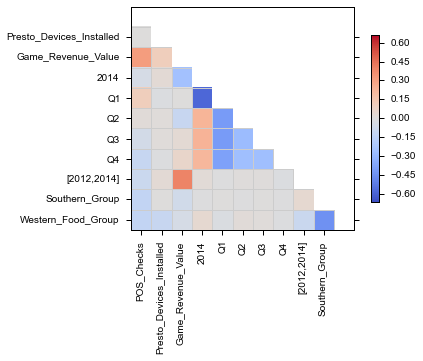

In [143]:
kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

ax = seaborn.corrplot(m7, annot=False, diag_names=False)

In [145]:
X = m7.drop(['Game_Revenue_Value'],axis=1)

X.head()


,POS_Checks,Presto_Devices_Installed,2014,Q1,Q2,Q3,Q4,"[2012,2014]",Southern_Group,Western_Food_Group
0,156,40,1,0,0,1,0,0,0,1
1,297,38,1,0,0,1,0,0,1,0
2,92,38,1,1,0,0,0,0,0,1
3,179,50,0,1,0,0,0,0,0,1
4,202,50,1,0,0,1,0,0,0,1


In [146]:

linear_model = LinearRegression()

# Fit our data
linear_model.fit(X,Y)

# Check our accuracy
linear_model.score(X,Y)

0.42595448587961349

In [147]:
Y.mean()

10.740757914852603

In [148]:
# Use zip to bring the column names 
#and the np.transpose function to bring together the coefficients from the model
#"transpose" is used to allaign our coefficient from rows to columns
coeff_df = DataFrame(zip(X.columns, np.transpose(linear_model.coef_)))
#the new seaborn treat assignment as just an assignment without printing
coeff_df

,0,1
0,POS_Checks,0.048671
1,Presto_Devices_Installed,0.152279
2,2014,-8.101535
3,Q1,-3.177328
4,Q2,-0.822953
5,Q3,1.512421
6,Q4,2.487860
7,"[2012,2014]",6.673102
8,Southern_Group,0.093479
9,Western_Food_Group,1.151168


In [149]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

linear_model2 = LinearRegression()

# Now fit the new model
linear_model2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [150]:
pred_train = linear_model2.predict(X_train)
pred_test = linear_model2.predict(X_test)
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)

print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 79.07
Fit a model X_train, and calculate MSE with X_test and Y_test: 77.42


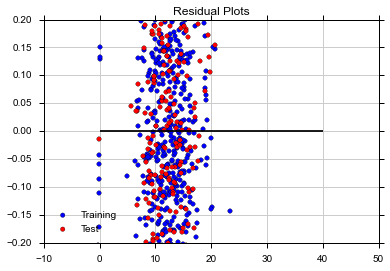

In [151]:
# Scatter plot the training data
#c = 'b' ----color = "brown", alpha =1 ----how see-through this is 
plt.ylim(-0.2,0.2)
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=1)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=1)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=0,xmax=40)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')


In [ ]:
#This Scatter plot shows a pretty similar result from the m6 model though getting worse by looking at the linear regression score
#which is slightly larger,
# Also. the MSE is above 77 in both the training set and the test set
#so this model is pretty relatively worse than the last one as the scatter plot shows a similar result

#In conclusion, I would have m6 as my model and the data from out[136] as the coefficient of the model
# if a linear regression score at 43 and MSE at around 31 is not considered too high.

